# Question no 2 (Crime_data)

## Hierarchical Clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage

In [2]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
def norm_func(i):
    x=(i-i.mean()/i.std())
    return x

In [4]:
df_norm=norm_func(df.iloc[:,1:])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [92.5, 92.5, 127.5, 127.5],
  [47.5, 47.5, 110.0, 110.0],
  [10.0, 10.0, 78.75, 78.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [187.5, 187.5, 244.0625, 244.0625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [355.0, 355.0, 365.0

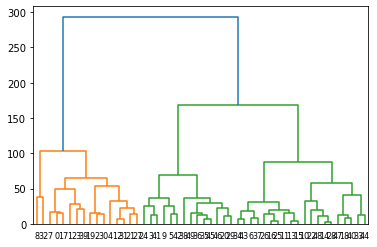

In [5]:
z=linkage(df_norm,method="complete", metric="euclidean")
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.,)

In [6]:
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete").fit(df_norm)
clusters_labels=pd.Series(model.labels_)

In [7]:
df["Clusters"]=clusters_labels
df=df.iloc[:,[5,0,1,2,3,4]]
df.iloc[:,:].groupby(df.Clusters).median()


,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,3.55,94.0,59.5,14.55
1,11.35,257.0,71.0,26.95
2,7.65,167.5,69.0,23.10
3,14.20,336.0,62.5,24.00


In [8]:
df.to_csv("crime.csv",encoding="utf-8")

## K-means Clustering

In [9]:
df

,Clusters,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.2
1,1,Alaska,10.0,263,48,44.5
2,1,Arizona,8.1,294,80,31.0
3,2,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6
5,2,Colorado,7.9,204,78,38.7
6,0,Connecticut,3.3,110,77,11.1
7,1,Delaware,5.9,238,72,15.8
8,3,Florida,15.4,335,80,31.9
9,2,Georgia,17.4,211,60,25.8


In [10]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_df = scaler.fit_transform(df.iloc[:,2:])

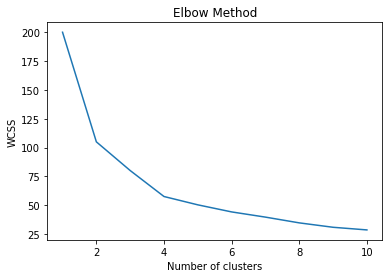

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df_df)

KMeans(n_clusters=4, random_state=42)

In [13]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [14]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

<ipython-input-14-891ecd1c1959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusterid_new'] = clusters_new.labels_


In [15]:
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [16]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean,mean
0,0,1.625000,13.937500,243.625000,53.750000,21.412500
1,1,1.062500,5.656250,138.875000,73.875000,18.781250
2,2,0.000000,3.600000,78.538462,52.076923,12.176923
3,3,1.384615,10.815385,257.384615,76.000000,33.192308


In [17]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean,mean
0,0,1.625000,13.937500,243.625000,53.750000,21.412500
1,1,1.062500,5.656250,138.875000,73.875000,18.781250
2,2,0.000000,3.600000,78.538462,52.076923,12.176923
3,3,1.384615,10.815385,257.384615,76.000000,33.192308


In [18]:
df

,Clusters,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,1,Alabama,13.2,236,58,21.2,0
1,1,Alaska,10.0,263,48,44.5,3
2,1,Arizona,8.1,294,80,31.0,3
3,2,Arkansas,8.8,190,50,19.5,0
4,1,California,9.0,276,91,40.6,3
5,2,Colorado,7.9,204,78,38.7,3
6,0,Connecticut,3.3,110,77,11.1,1
7,1,Delaware,5.9,238,72,15.8,1
8,3,Florida,15.4,335,80,31.9,3
9,2,Georgia,17.4,211,60,25.8,0


## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [20]:
df=pd.read_csv('crime_data.csv')

In [21]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [23]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [24]:
array=df.values

In [25]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [26]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [27]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [28]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [29]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [30]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [31]:
pd.concat([df,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
